In [76]:
print('*******Flight_Data_Project********')

*******Flight_Data_Project********


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import seaborn as sn
from sklearn.metrics import confusion_matrix
import re
%matplotlib inline
from sklearn import model_selection, preprocessing, naive_bayes,metrics
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
df_flights = pd.read_csv('/Users/jaswanthjerripothula/Downloads/flights_data.csv')
print(df_flights.shape)

(10683, 11)


In [5]:
df_flights.head(11)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration(minutes),Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,145,0,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,930,1,In-flight meal not included,11087d
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,1265,1,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,1530,1,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,470,1,No info,8625


In [6]:
df_flights.tail(11)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration(minutes),Total_Stops,Additional_Info,Price
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,1195,2 stops,In-flight meal not included,11150
10673,Jet Airways,27/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,13:25,04:25 28 May,900,2 stops,No info,16704
10674,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,20:35,21:20 13 Mar,1485,1 stop,In-flight meal not included,11087
10675,Air India,9/06/2019,Mumbai,Hyderabad,BOM → HYD,06:20,07:40,80,non-stop,No info,3100
10676,Multiple carriers,1/05/2019,Delhi,Cochin,DEL → BOM → COK,10:20,19:00,520,1 stop,No info,9794
10677,SpiceJet,21/05/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,160,non-stop,No check-in baggage included,3257
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,150,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,155,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,180,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,160,non-stop,No info,12648


In [12]:
df_flights.count()

Airline              10683
Date_of_Journey      10683
Source               10683
Destination          10683
Route                10667
Dep_Time             10683
Arrival_Time         10683
Duration(minutes)    10683
Total_Stops          10656
Additional_Info      10683
Price                10683
dtype: int64

In [13]:
df_flights.groupby('Airline').describe()

Duration(minutes)                          \
                                              count        mean         std   
Airline                                                                       
Air Asia                                      319.0  348.275862  271.237275   
Air India                                    1752.0  943.421804  604.195715   
GoAir                                         194.0  298.969072  136.836838   
IndiGo                                       2053.0  285.406722  218.846252   
Jet Airways                                  3849.0  849.733697  507.925442   
Jet Airways Business                            6.0  386.666667   96.884811   
Multiple carriers                            1196.0  625.769231  156.407344   
Multiple carriers Premium economy              13.0  606.538462  173.893941   
SpiceJet                                      818.0  178.484108   89.628434   
Trujet                                          1.0  195.000000         NaN   
Vistara                                       479.0  598.413361  553.519349   
Vistara Premium economy                         3.0  153.333333   17.559423   

                                                                         
                                     min    25%    50%      75%     max  
Airline                                                                  
Air Asia                           150.0  155.0  170.0   500.00   955.0  
Air India                           75.0  320.0  955.0  1440.00  2480.0  
GoAir                              155.0  175.0  310.0   370.00   555.0  
IndiGo                              85.0  155.0  175.0   320.00   985.0  
Jet Airways                         80.0  435.0  800.0  1295.00  2860.0  
Jet Airways Business               280.0  310.0  370.0   475.00   500.0  
Multiple carriers                  375.0  480.0  615.0   750.00   935.0  
Multiple carriers Premium economy  395.0  440.0  620.0   725.00   900.0  
SpiceJet                            80.0  140.0  150.0   173.75   520.0  
Trujet                             195.0  195.0  195.0   195.00   195.0  
Vistara                            135.0  160.0  190.0   972.50  1750.0  
Vistara Premium economy            135.0  145.0  155.0   162.50   170.0

In [14]:
df_flights.groupby('Airline').count()

,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration(minutes),Total_Stops,Additional_Info,Price
Airline,,,,,,,,,,
Air Asia,319,319,319,318,319,319,319,319,319,319
Air India,1752,1752,1752,1748,1752,1752,1752,1748,1752,1752
GoAir,194,194,194,194,194,194,194,193,194,194
IndiGo,2053,2053,2053,2049,2053,2053,2053,2047,2053,2053
Jet Airways,3849,3849,3849,3848,3849,3849,3849,3843,3849,3849
Jet Airways Business,6,6,6,6,6,6,6,6,6,6
Multiple carriers,1196,1196,1196,1194,1196,1196,1196,1193,1196,1196
Multiple carriers Premium economy,13,13,13,13,13,13,13,13,13,13
SpiceJet,818,818,818,818,818,818,818,815,818,818


In [15]:
category_count = pd.DataFrame()
category_count['count'] = df_flights['Airline'].value_counts()

In [16]:
category_count['count']

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jet Airways'),
  Text(1, 0, 'IndiGo'),
  Text(2, 0, 'Air India'),
  Text(3, 0, 'Multiple carriers'),
  Text(4, 0, 'SpiceJet'),
  Text(5, 0, 'Vistara'),
  Text(6, 0, 'Air Asia'),
  Text(7, 0, 'GoAir'),
  Text(8, 0, 'Multiple carriers Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Vistara Premium economy'),
  Text(11, 0, 'Trujet')])

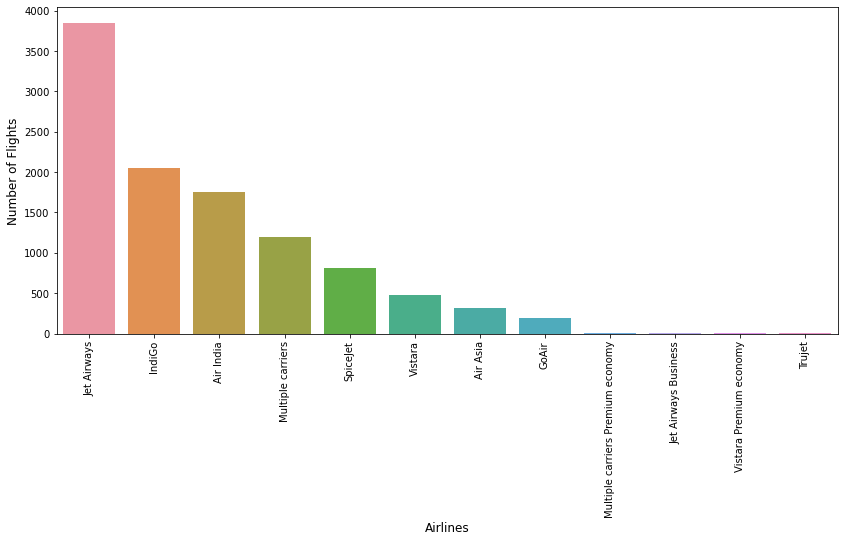

In [36]:
fig , ax = plt.subplots(figsize = (14,6))
sn.barplot (x = category_count.index , y = category_count['count'],ax = ax)
ax.set_ylabel ('Number of Flights',fontsize = 12)
ax.set_xlabel ('Airlines',fontsize = 12)
ax.tick_params(labelsize = 10)
plt.xticks(rotation = 90)

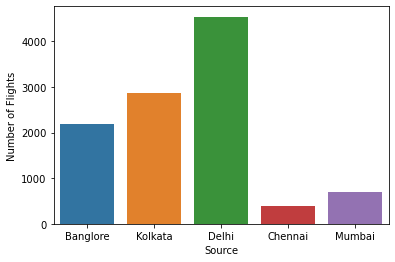

In [26]:
sn.countplot(data = df_flights, x = 'Source')
plt.ylabel('Number of Flights',fontsize = 10)
plt.xlabel('Source',fontsize = 10)
ax.tick_params(labelsize = 10)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

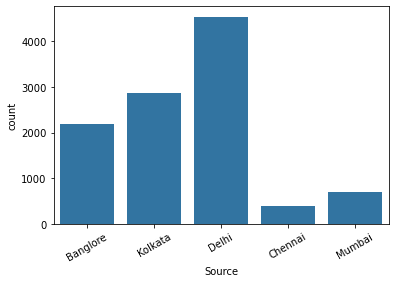

In [27]:
base_color = sn.color_palette()[0]
sn.countplot(data = df_flights, x = 'Source', color = base_color)
plt.xticks(rotation = 30)

<AxesSubplot:xlabel='Source', ylabel='count'>

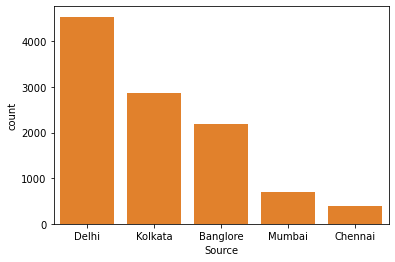

In [28]:
base_color = sn.color_palette()[1]
general_order = df_flights['Source'].value_counts().index
sn.countplot(data = df_flights, x = 'Source', color = base_color, order = general_order)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

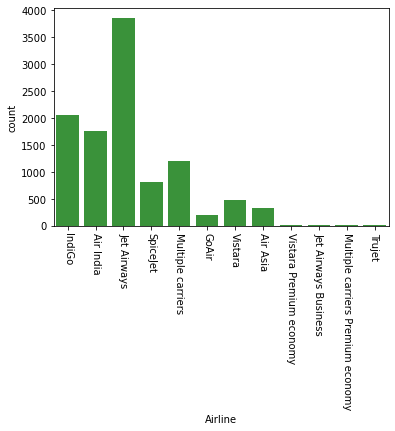

In [38]:
base_color = sn.color_palette()[2]
sn.countplot(data = df_flights, x = 'Airline', color = base_color)
plt.xticks(rotation = 270)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

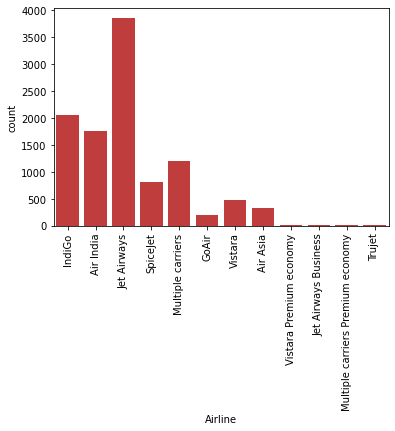

In [40]:
base_color = sn.color_palette()[3]
sn.countplot(data = df_flights, x = 'Airline', color = base_color)
plt.xticks(rotation = 90)

In [41]:
df_flights.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                16
Dep_Time              0
Arrival_Time          0
Duration(minutes)     0
Total_Stops          27
Additional_Info       0
Price                 0
dtype: int64

/Users/jaswanthjerripothula/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Airline'),
  Text(1, 0, 'Date_of_Journey'),
  Text(2, 0, 'Source'),
  Text(3, 0, 'Destination'),
  Text(4, 0, 'Route'),
  Text(5, 0, 'Dep_Time'),
  Text(6, 0, 'Arrival_Time'),
  Text(7, 0, 'Duration(minutes)'),
  Text(8, 0, 'Total_Stops'),
  Text(9, 0, 'Additional_Info'),
  Text(10, 0, 'Price')])

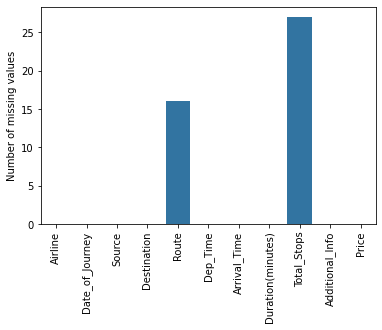

In [45]:
ns_counts = df_flights.isna().sum()
base_color = sn.color_palette()[0]
sn.barplot(ns_counts.index.values, ns_counts, color = base_color)
plt.ylabel('Number of missing values',fontsize = 10)
plt.xticks(rotation = 90)

In [47]:
#Preprocessing Tweets for removing punctuations(! , '), @ , # , https , special characters
def processMessage(tweet):
    from string import punctuation
    tweet = re.sub(r'\&\w*;','',tweet)
    tweet = re.sub('@[^\s]+','',tweet)
    tweet = re.sub(r'\$\w*','',tweet)
    tweet = tweet.lower()
    tweet = re.sub(r'https?:\/\/.*\/\w*','',tweet)
    tweet = re.sub(r'#\w*','',tweet)
    tweet = re.sub(r'['+punctuation.replace('@','')+']+','',tweet)
    tweet = re.sub(r'\b\w{1,2}\b','',tweet)
    tweet = re.sub(r'\s\s+',' ',tweet)
    tweet = tweet.lstrip(' ')
    tweet = ''.join(c for c in tweet if c <= '\uFFFF')
    return tweet

Text(0.5, 1.0, 'Flight Destination\n')

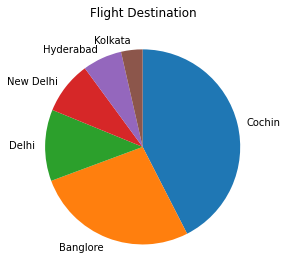

In [58]:
sort_counts = df_flights['Destination'].value_counts()
plt.pie(sort_counts, labels = sort_counts.index, startangle = 90, counterclock = False);
plt.axis('square')
plt.title('Flight Destination\n')

Text(0.5, 1.0, 'Flight Source\n')

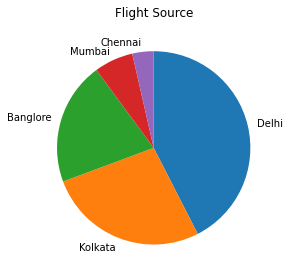

In [59]:
sort_counts = df_flights['Source'].value_counts()
plt.pie(sort_counts, labels = sort_counts.index, startangle = 90, counterclock = False);
plt.axis('square')
plt.title('Flight Source\n')

(array([4.198e+03, 1.988e+03, 1.720e+03, 7.870e+02, 9.310e+02, 8.450e+02,
        1.320e+02, 7.000e+01, 1.000e+01, 2.000e+00]),
 array([  75. ,  353.5,  632. ,  910.5, 1189. , 1467.5, 1746. , 2024.5,
        2303. , 2581.5, 2860. ]),
 <BarContainer object of 10 artists>)

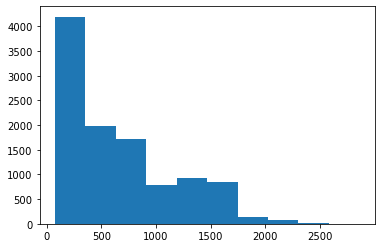

In [60]:
plt.hist(data = df_flights, x = 'Duration(minutes)')

(array([1799., 1775.,  905.,  919.,  545.,  560.,  489.,  361.,  323.,
         411.,  265.,  236.,  211.,  202.,  169.,  155.,  139.,  114.,
         125.,  113.,  118.,  117.,  102.,   85.,   79.,   83.,   79.,
          70.,   71.,   63.]),
 array([   0. ,   61.6,  123.2,  184.8,  246.4,  308. ,  369.6,  431.2,
         492.8,  554.4,  616. ,  677.6,  739.2,  800.8,  862.4,  924. ,
         985.6, 1047.2, 1108.8, 1170.4, 1232. , 1293.6, 1355.2, 1416.8,
        1478.4, 1540. , 1601.6, 1663.2, 1724.8, 1786.4, 1848. ]),
 <BarContainer object of 30 artists>)

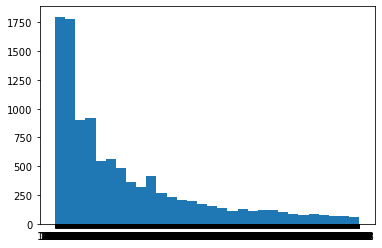

In [65]:
plt.hist(data = df_flights, x = 'Price', bins = 30)

Text(0.5, 1.0, 'Total Stops\n')

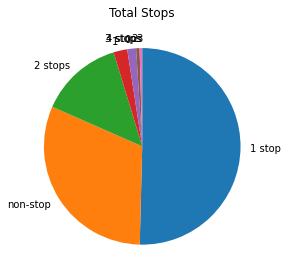

In [74]:
sort_counts = df_flights['Total_Stops'].value_counts()
plt.pie(sort_counts, labels = sort_counts.index, startangle = 90, counterclock = False);
plt.axis('square')
plt.title('Total Stops\n')

In [75]:
print('********Flight_Data_Project is done successfully**********')

********Flight_Data_Project is done successfully**********
